In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import backend
import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [2]:
# Load data
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [3]:
x_train.shape

(50000, 32, 32, 3)

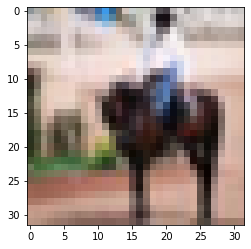

In [4]:
plt.imshow(x_train[11])

In [5]:
x_train[0].max()

255

In [6]:
# Normalize image pixel values
x_train = x_train / 255
x_test = x_test / 255

In [7]:
np.unique(y_test)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [8]:
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [9]:
# Prepare one-hot encoded y-values
y_train_cat = to_categorical(y=y_train, num_classes=10)
y_test_cat = to_categorical(y=y_test, num_classes=10)

In [10]:
print(x_train.shape)
print(x_test.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)


In [11]:
# Prepare GPU
def prep_gpu():
    phy_gpus = tf.config.list_physical_devices(device_type='GPU')

    for gpu in phy_gpus:
        tf.config.experimental.set_memory_growth(device=gpu, enable=True)

    log_gpus = tf.config.list_logical_devices(device_type='GPU')
    phy_cpus = tf.config.list_physical_devices(device_type='CPU')
    log_cpus = tf.config.list_logical_devices(device_type='CPU')

    print("Physical GPUs: {}\tLogical GPUs: {}\nPhysical CPUs: {}\tLogical CPUs: {}".format(len(phy_gpus),
                                                                                             len(log_gpus),
                                                                                             len(phy_cpus),
                                                                                             len(log_cpus)))

In [12]:
prep_gpu()

Physical GPUs: 0	Logical GPUs: 0
Physical CPUs: 1	Logical CPUs: 1


In [13]:
# Build model
backend.clear_session()
model = Sequential()

# Convolutional layer
model.add(Conv2D(filters=32, kernel_size=(4, 4), input_shape=(32, 32, 3), activation='relu'))
# Pooling layer
model.add(MaxPool2D(pool_size=(2, 2)))

# Convolutional layer
model.add(Conv2D(filters=32, kernel_size=(4, 4), input_shape=(32, 32, 3), activation='relu'))
# Pooling layer
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(512, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

# Create early stopping callback
early_stop = EarlyStopping(monitor='val_loss', mode='min', patience=2)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 29, 29, 32)        1568      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 32)        16416     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 800)               0         
_________________________________________________________________
dense (Dense)                (None, 512)               410112    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                5

In [14]:
# Fit the model
model.fit(x=x_train, y=y_train_cat, epochs=20, validation_data=(x_test, y_test_cat), callbacks=[early_stop], verbose=1)

Epoch 1/20
1563/1563 [==============================] - 61s 39ms/step - loss: 1.4683 - accuracy: 0.4684 - val_loss: 1.3237 - val_accuracy: 0.5206
Epoch 2/20
1563/1563 [==============================] - 59s 38ms/step - loss: 1.1510 - accuracy: 0.5918 - val_loss: 1.2055 - val_accuracy: 0.5741
Epoch 3/20
1563/1563 [==============================] - 55s 35ms/step - loss: 0.9907 - accuracy: 0.6536 - val_loss: 1.0310 - val_accuracy: 0.6400
Epoch 4/20
1563/1563 [==============================] - 62s 40ms/step - loss: 0.8633 - accuracy: 0.6990 - val_loss: 0.9443 - val_accuracy: 0.6719
Epoch 5/20
1563/1563 [==============================] - 63s 41ms/step - loss: 0.7550 - accuracy: 0.7367 - val_loss: 0.9251 - val_accuracy: 0.6868
Epoch 6/20
1563/1563 [==============================] - 61s 39ms/step - loss: 0.6618 - accuracy: 0.7694 - val_loss: 0.9252 - val_accuracy: 0.6885
Epoch 7/20
1563/1563 [==============================] - 62s 40ms/step - loss: 0.5664 - accuracy: 0.8010 - val_loss: 0.9668 -

In [15]:
# Model evaluation
metrics = pd.DataFrame(model.history.history)
print(metrics)

       loss  accuracy  val_loss  val_accuracy
0  1.468261   0.46836  1.323656        0.5206
1  1.150972   0.59182  1.205546        0.5741
2  0.990675   0.65362  1.030969        0.6400
3  0.863290   0.69904  0.944285        0.6719
4  0.755038   0.73670  0.925117        0.6868
5  0.661772   0.76940  0.925159        0.6885
6  0.566379   0.80100  0.966817        0.6895


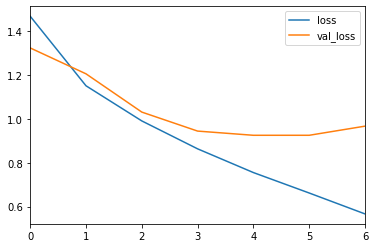

In [16]:
metrics[['loss', 'val_loss']].plot()

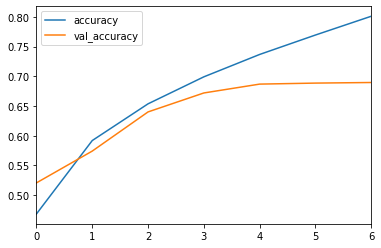

In [17]:
metrics[['accuracy', 'val_accuracy']].plot()

In [18]:
model.evaluate(x_train, y_train_cat)

1563/1563 [==============================] - 15s 10ms/step - loss: 0.4566 - accuracy: 0.8433


[0.45663565397262573, 0.8432599902153015]

In [19]:
model.evaluate(x_test, y_test_cat)

313/313 [==============================] - 3s 9ms/step - loss: 0.9668 - accuracy: 0.6895


[0.9668170213699341, 0.6894999742507935]

In [20]:
# Make predictions and see classification report
y_pred = np.argmax(model.predict(x_test), axis=-1)

In [21]:
print(classification_report(y_true=np.array(y_test), y_pred=y_pred))
print("\n")
print(confusion_matrix(y_true=np.array(y_test), y_pred=y_pred))

              precision    recall  f1-score   support

           0       0.70      0.75      0.72      1000
           1       0.79      0.81      0.80      1000
           2       0.57      0.62      0.59      1000
           3       0.68      0.30      0.42      1000
           4       0.63      0.66      0.65      1000
           5       0.51      0.70      0.59      1000
           6       0.80      0.76      0.78      1000
           7       0.74      0.74      0.74      1000
           8       0.80      0.78      0.79      1000
           9       0.76      0.77      0.76      1000

    accuracy                           0.69     10000
   macro avg       0.70      0.69      0.68     10000
weighted avg       0.70      0.69      0.68     10000



[[750  28  59   6  14  15   2  13  84  29]
 [ 27 815  10   4   6   7   4   6  20 101]
 [ 75   7 618  20  81  99  53  24  11  12]
 [ 32  15  91 303  96 317  55  52  16  23]
 [ 24   7  92  20 664  74  40  62   9   8]
 [ 12   8  73  45  72 70